In [1]:
import sys
import matplotlib.pyplot as plt

sys.path.append('./../')

from utils.phase_1 import *
BLAZE_FACE_PATH = './../utils/libs/BlazeFace/'

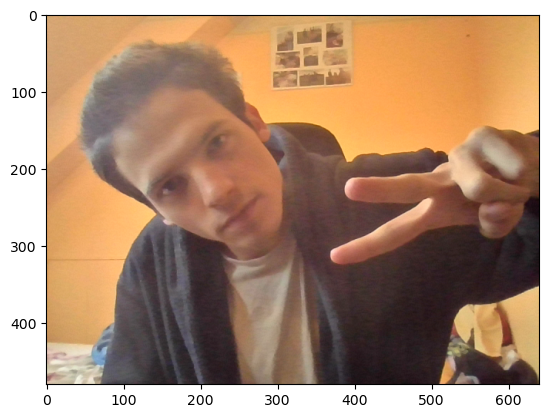

In [2]:
## Select taking a photo or using a sample image
original_img = take_photo()
#original_img = cv2.imread('../assets/the-office-handshake.jpg')

original_img = reverse_channels(original_img)
downsized_img = downsize_img(original_img, (128, 128))
plt.imshow(original_img)
plt.show()

In [12]:
device = get_torch_device()
print(device)

model = load_blazeface(BLAZE_FACE_PATH, device)
configure_params(model, min_score_thresh=0.75, min_suppression_threshold=0.3)

PyTorch version: 2.1.0
CUDA version: None
cuDNN version: None
cpu


In [5]:
detections = model.predict_on_image(downsized_img)
assert len(detections) != 0, 'No faces detected'
detections.shape

torch.Size([1, 17])

Found 1 faces


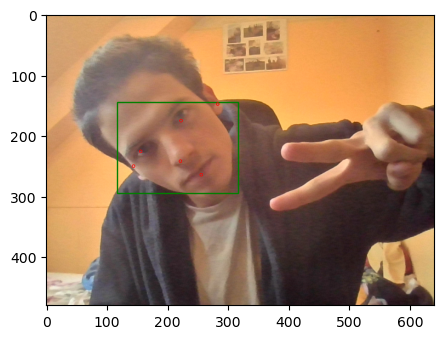

In [6]:
plot_detections(original_img, detections)

In [7]:
biggest_face_idx = get_idx_of_biggest_face(detections)
print(f"Biggest face id: {biggest_face_idx}")

Biggest face id: 0


In [8]:
detections[biggest_face_idx]

tensor([0.3003, 0.1823, 0.6119, 0.4938, 0.2427, 0.4694, 0.3468, 0.3637, 0.3452,
        0.5031, 0.3991, 0.5498, 0.2242, 0.5201, 0.4413, 0.3064, 0.9837])

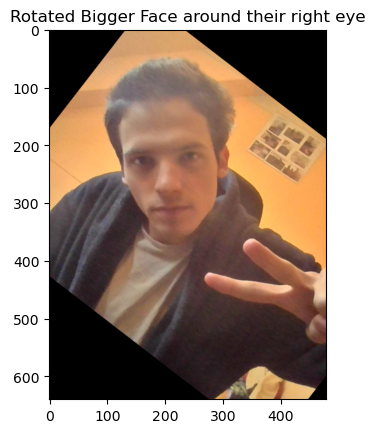

In [9]:
rotated_img = reset_face_angle(original_img, detections[biggest_face_idx])
plt.imshow(rotated_img)
plt.title("Rotated Bigger Face around their right eye")
plt.show()

Found 1 faces


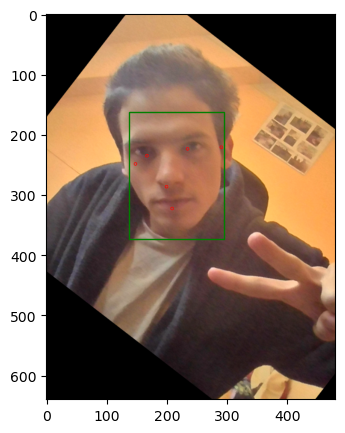

In [10]:
downsized_img = downsize_img(rotated_img, (128, 128))
detections = model.predict_on_image(downsized_img)

plot_detections(rotated_img, detections)

Text(0.5, 1.0, 'Cropped Bigger Face')

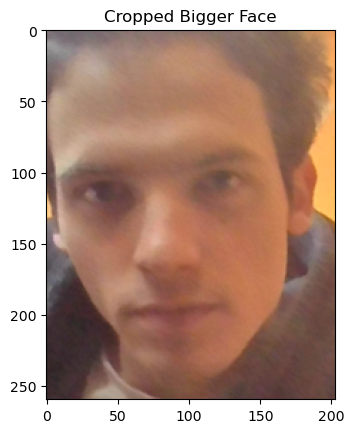

In [11]:
cropped_face = crop_face_from_img(
 img=rotated_img, 
 detections=detections[biggest_face_idx],
 margin=Margin("30%", 30, 15, 0) 
)
plt.imshow(cropped_face)
plt.title("Cropped Bigger Face")